In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import imageio

In [2]:
def densificaRotulosParaVetorDeResposta(gabaritoDeRespostaDoTreino, numeroDeCategorias):
    quantidadeDeRespostas = gabaritoDeRespostaDoTreino.shape[0]
    
    print(quantidadeDeRespostas)
    
    intervaloDoIndice = np.arange(quantidadeDeRespostas) * numeroDeCategorias
    
    respostaCategorica = np.zeros((quantidadeDeRespostas, numeroDeCategorias))
    
    respostaCategorica.flat[intervaloDoIndice + gabaritoDeRespostaDoTreino.ravel()] = 1
    return respostaCategorica

In [3]:
def exibeImagemDaMatriz(imagemRedimensionada):
    plt.imsave('pic.png', imagemRedimensionada)
    # read the image
    im = plt.imread('pic.png')
    # show the image
    plt.imshow(im)
    #save the image array to binary file
    np.save('mypic', im)
    plt.show()

In [4]:
def salvaImagemDaMatriz(imagemRedimensionada):
    numeroMagico = np.random.randint(0,999)
    nomeDoArquivo = "imagem"+str(numeroMagico)+".png"
    plt.imsave(nomeDoArquivo, imagemRedimensionada)
    #np.save(nomeDoArquivo, im)
    

In [5]:
def salvaImagemGif(nomeDaImagem, colecaoImagens):
    imageio.mimwrite(nomeDaImagem+".gif", colecaoImagens,'gif')

In [6]:
def salvaConjuntoImagemGif(nomeDaColecao, colecaoDeGifs):
    for indice in range(len(colecaoDeGifs)):
        nomeDoArquivo = nomeDaColecao + " - "+ str(indice)+".gif"
        salvaImagemGif(nomeDoArquivo,colecaoDeGifs[indice])

In [7]:
def abreImagemExemplo():
    imagem = imageio.imread('1.jpg','jpg')
    return imagem

In [8]:
dataTR = pd.read_csv('input/train.csv')
marcadorDoIndiceDeTreino = 0
imagens = dataTR.iloc[:,1:].values
imagens = imagens.astype(np.float)
gabaritoDeRespostaDoTreino = dataTR.iloc[:,0].values
numeroDeCategorias = 10
listaDeRespostaCategoricas = densificaRotulosParaVetorDeResposta(gabaritoDeRespostaDoTreino, numeroDeCategorias)

42000


In [9]:
numeroMagico = np.random.randint(0,750)
imagemRedimensionada = imagens[numeroMagico].reshape(28,28)
identificacaoDaImagem = gabaritoDeRespostaDoTreino[numeroMagico]


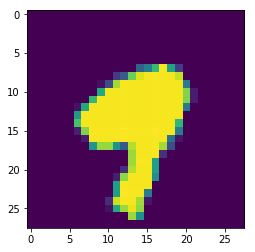

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
exibeImagemDaMatriz(imagemRedimensionada)
print(identificacaoDaImagem)
print (listaDeRespostaCategoricas[numeroMagico])

In [11]:
def geraFiltroAleatorioComTamanho(tamanhoDaJanela):
    filtro = np.random.rand(tamanhoDaJanela,tamanhoDaJanela)
    return filtro

In [12]:
def calculaProdutoEscalarMatrizesComTamanhoDaJanela( matriz1, matriz2, tamanhoDaJanela):
    valorEscalar = 0
    for i in range(matriz1.shape[0]):
        valorEscalar += np.dot(matriz1[i],matriz2[i])
    return valorEscalar

In [13]:
def relu(x):
    if x<0:
        return 0
    else:
        return x

In [14]:
def maxpollDaMatriz(matriz):
    return np.argmax(matriz)

In [15]:
def executaConvolucao (entradaDaConvolucao,tamanhoDaJanela):
    iteracaoColuna  = 0
    iteracaoLinha   = 0
    
    dimensaoXMatrizDeEntrada = int (entradaDaConvolucao.shape[0])
    dimensaoYMatrizDeEntrada = int (entradaDaConvolucao.shape[1])
    
    tamanhoXDaMatrizConvolucao = dimensaoXMatrizDeEntrada - tamanhoDaJanela
    tamanhoYDaMatrizConvolucao = dimensaoYMatrizDeEntrada - tamanhoDaJanela
    
    CamadaConvolucao    = np.zeros([tamanhoXDaMatrizConvolucao, tamanhoYDaMatrizConvolucao])
    
    filtro = geraFiltroAleatorioComTamanho(tamanhoDaJanela)
    
    for iteracaoLinha in range(tamanhoXDaMatrizConvolucao):
        for iteracaoColuna in range(tamanhoYDaMatrizConvolucao):
            
            fimDaColunaDaJanela = iteracaoColuna + tamanhoDaJanela
            fimDaLinhaDaJanela = iteracaoLinha + tamanhoDaJanela
            
            submatriz = entradaDaConvolucao [iteracaoLinha:fimDaLinhaDaJanela, iteracaoColuna: fimDaColunaDaJanela]
            
            valorPixelDaConvolucao = calculaProdutoEscalarMatrizesComTamanhoDaJanela(submatriz , filtro,tamanhoDaJanela)
            
            CamadaConvolucao [iteracaoLinha, iteracaoColuna] =  relu(valorPixelDaConvolucao)
    return CamadaConvolucao




In [16]:
def executaMaxpooling(matrizDeEntrada, tamanhoDaJanela, intervaloPorIteracao):
    dimensaoXMatrizDeEntrada = int (matrizDeEntrada.shape[0])
    dimensaoYMatrizDeEntrada = int (matrizDeEntrada.shape[1])
    tamanhoXDaMatrizMaxPolling = int(((matrizDeEntrada.shape[0] - tamanhoDaJanela) )/intervaloPorIteracao)+ 1
    tamanhoYDaMatrizMaxPolling = int(((matrizDeEntrada.shape[1] - tamanhoDaJanela) )/intervaloPorIteracao)+ 1

    matrizMaxPool = np.zeros([tamanhoXDaMatrizMaxPolling,tamanhoYDaMatrizMaxPolling])

    colunaMaxPool = 0
    linhaMaxPool  = 0
    for iteracaoLinha in range(0,dimensaoXMatrizDeEntrada-tamanhoDaJanela ,intervaloPorIteracao):
        colunaMaxPool = 0
        for iteracaoColuna in range(0, dimensaoYMatrizDeEntrada-tamanhoDaJanela , intervaloPorIteracao):
            submatriz = matrizDeEntrada[ iteracaoLinha: iteracaoLinha + tamanhoDaJanela, iteracaoColuna: iteracaoColuna + tamanhoDaJanela ]
            matrizMaxPool[ linhaMaxPool,colunaMaxPool ] = int(np.argmax(submatriz))
            colunaMaxPool += 1
        linhaMaxPool += 1
    return matrizMaxPool

In [17]:
def obtemcuboConvolucional(entrada,quantidadeDeFiltros,tamanhoDaJanela):
    cuboConvolucional =  []
    if (len(np.shape(entrada)) > 2):
        for caracteristica in range(np.shape(entrada)[0]):
            cubo = obtemcuboConvolucional(entrada[caracteristica],quantidadeDeFiltros,tamanhoDaJanela)
            cuboConvolucional.append(cubo)
    else:
        for i in range(quantidadeDeFiltros):
            cuboConvolucional.append(executaConvolucao(entrada,tamanhoDaJanela))
    return cuboConvolucional

In [18]:
def obtemCuboMaxPooling(cuboConvolucional,tamanhoDaJanela,intervaloPorIteracao):
    cuboMaxPooling = []
    if (len(np.shape(cuboConvolucional))>3):
        for subTensor in cuboConvolucional:
            submatrizRecursiva = obtemCuboMaxPooling(subTensor,tamanhoDaJanela,intervaloPorIteracao)
            cuboMaxPooling.append(submatrizRecursiva)
    else:
        for i in range(np.shape(cuboConvolucional)[0]):
            cuboMaxPooling.append(executaMaxpooling(cuboConvolucional[i], tamanhoDaJanela, intervaloPorIteracao))
    return cuboMaxPooling

In [19]:
#imagemDeExemplo = abreImagemExemplo()
imagemDeExemplo = imagemRedimensionada
imagemDeExemploArray = np.asarray(imagemRedimensionada)

In [20]:
def exibeCanalVermelho(imagem):
    plt.title('Canal Vermelho')
    plt.ylabel('Altura {}'.format(imagem.shape[0]))
    plt.xlabel('Comprimento {}'.format(imagem.shape[1]))
    if (len(imagem.shape)>3):
        plt.imshow(imagem[ : , : , 0])
        print(imagem[ : , : , 0].shape)
        salvaImagemDaMatriz(imagem[ : , : , 0])
    if (len(imagem.shape) == 2):
        plt.imshow(imagem)
        plt.show()

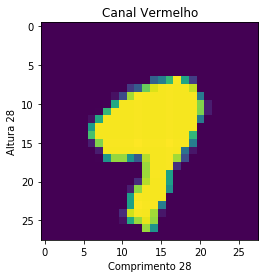

In [21]:
exibeCanalVermelho(imagemDeExemplo)

In [22]:
#plt.title('Canal Verde')
#plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
#plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

#plt.imshow(imagemDeExemplo[ : , : , 1])
#salvaImagemDaMatriz(imagemDeExemplo[ : , : , 1])
#plt.show()

In [23]:
#plt.title('Canal Azul')
#plt.ylabel('Altura {}'.format(imagemDeExemplo.shape[0]))
#plt.xlabel('Comprimento {}'.format(imagemDeExemplo.shape[1]))

#plt.imshow(imagemDeExemplo[ : , : , 2])
#salvaImagemDaMatriz(imagemDeExemplo[ : , : , 2])
#plt.show()

In [24]:
#quantidadeDeFiltros = 9
#tamanhoDoFiltro = 4

In [44]:
def obtemVetorDecaracteristicas(entrada):
    
    quantidadeDeFiltrosPrimeiraConvolucao = 9
    tamanhoDoFiltroPrimeiraConvolucao = 4
    cuboConvolucional = obtemcuboConvolucional(entrada,quantidadeDeFiltrosPrimeiraConvolucao,tamanhoDoFiltroPrimeiraConvolucao)
    
    tamanhoDaJanelaPrimeiroMaxPool = 2
    passosPorIteracaoPrimeiroMaxPool = 2
    PrimeiroCuboMaxPooling = obtemCuboMaxPooling (cuboConvolucional, tamanhoDaJanelaPrimeiroMaxPool, passosPorIteracaoPrimeiroMaxPool)
    
    quantidadeDeFiltrosSegundaConvolucao = 9
    tamanhoDaJanelaSegundaConvolucao = 4
    segundaConvolucao = obtemcuboConvolucional(PrimeiroCuboMaxPooling, quantidadeDeFiltrosSegundaConvolucao, tamanhoDaJanelaSegundaConvolucao)
    
    tamanhoDaJanelaSegundoMaxPool = 2
    passosPorIteracaoSegundoMaxPool = 1
    SegundoTensorMaxPooling = obtemCuboMaxPooling(segundaConvolucao,tamanhoDaJanelaSegundoMaxPool,passosPorIteracaoSegundoMaxPool)

    quantidadeDeFiltrosTerceiraConvolucao = 9
    tamanhoDaJanelaTerceiraConvolucao = 2
    terceiraCamadaConvolucional = obtemcuboConvolucional(SegundoTensorMaxPooling, quantidadeDeFiltrosTerceiraConvolucao, tamanhoDaJanelaTerceiraConvolucao)
    
    tamanhoDaJanela = 2
    passosPorIteracao = 1
    terceiroTensorMaxPooling = obtemCuboMaxPooling(terceiraCamadaConvolucional, tamanhoDaJanela, passosPorIteracao)
    
    dimensaoDoVetor = 1
    
    for dimensaoDoTensor in np.shape(terceiroTensorMaxPooling):
        dimensaoDoVetor *= dimensaoDoTensor
    
    vetorSaidaCapturaDeCaracteristica = np.asarray(terceiroTensorMaxPooling).reshape(1,dimensaoDoVetor)
    return vetorSaidaCapturaDeCaracteristica

In [26]:
#cuboConvolucionalVermelho = obtemcuboConvolucional(imagemDeExemplo,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalVermelhoMatriz = np.asarray(cuboConvolucionalVermelho)
#salvaImagemGif('cuboConvolucional',cuboConvolucionalVermelho)

In [27]:
#cuboConvolucionalAzul = obtemcuboConvolucional(imagemDeExemploAzul,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalAzulMatriz = np.asarray(cuboConvolucionalAzul)
#salvaImagemGif('cuboConvolucionalMatrizAzul.gif',cuboConvolucionalAzul)

In [28]:
#cuboConvolucionalVerde = obtemcuboConvolucional(imagemDeExemploVerde,quantidadeDeFiltros,tamanhoDoFiltro)
#cuboConvolucionalVerdeMatriz = np.asarray(cuboConvolucionalVerde)
#salvaImagemGif('cuboConvolucionalMatrizVerde.gif',cuboConvolucionalVerde)

In [29]:
#cuboConvolucionalColorido = []
#for i in range (quantidadeDeFiltros):
#    cuboConvolucionalColorido[i].append(cuboConvolucionalVermelho[i])
#    cuboConvolucionalColorido[i].append(cuboConvolucionalVerde[i])
#    cuboConvolucionalColorido[i].append(cuboConvolucionalAzul[i])

#cuboConvolucionalColoridoMatriz = np.asarray(cuboConvolucionalColorido)
#salvaImagemGif('cuboConvolucionalMatrizColorido.gif',cuboConvolucionalColoridoMatriz)

In [30]:
#tamanhoDaJanela = 2
#passosPorIteracao = 2
#CuboMaxPooling = obtemCuboMaxPooling (cuboConvolucionalVermelhoMatriz, tamanhoDaJanela, passosPorIteracao)
#CuboMaxPoolingMatriz = np.asarray(CuboMaxPooling)


In [31]:
#for imagem in CuboMaxPooling:
#    exibeImagemDaMatriz(imagem)
#    print(np.shape(imagem))

In [32]:
#nao rodar ainda pois esta sendo testado a celula anterior (muito processamento)
#segundoCuboConvolucional = obtemcuboConvolucional(CuboMaxPoolingMatriz,20,4)
#segundoCuboConvolucionalMatriz = np.asarray(segundoCuboConvolucional)
#salvaConjuntoImagemGif(str(identificacaoDaImagem),segundoCuboConvolucionalMatriz)

In [33]:
#quantidadeDeFiltros2 = 9
#tamanhoDaJanela2 = 4
#segundaConvolucao = obtemcuboConvolucional(CuboMaxPooling, quantidadeDeFiltros2, tamanhoDaJanela2)
#print(np.shape(CuboMaxPooling))

In [34]:
#tamanhoDaJanela = 2
#passosPorIteracao = 1
#segundoMaxPooling = []
#for cuboDaConvolucao in segundaConvolucao:
#    segundoMaxPooling.append(obtemCuboMaxPooling(cuboDaConvolucao,tamanhoDaJanela, passosPorIteracao))
#segundoMaxPooling = obtemCuboMaxPooling(segundaConvolucao,tamanhoDaJanela,passosPorIteracao)

In [35]:
#print(np.shape(segundoMaxPooling))

In [36]:
#quantidadeDeFiltros3 = 9
#tamanhoDaJanela3 = 2
#terceiraCamadaConvolucional = []
#for cuboDoSegundoMaxPool in segundoMaxPooling:
#    terceiraCamadaConvolucional.append( obtemcuboConvolucional(cuboDoSegundoMaxPool,quantidadeDeFiltros3,tamanhoDaJanela3))

In [37]:
#terceiroTensorMaxPooling = []
#tamanhoDaJanela = 2
#passosPorIteracao = 1
#terceiroTensorMaxPooling = obtemCuboMaxPooling(terceiraCamadaConvolucional, tamanhoDaJanela, passosPorIteracao)
#np.shape(terceiroTensorMaxPooling)

In [38]:
#dimensaoDoVetor = 1
#for dimensaoDoTensor in np.shape(terceiroTensorMaxPooling):
#    dimensaoDoVetor *= dimensaoDoTensor
    
#vetorSaidaCapturaDeCaracteristica = np.asarray(terceiroTensorMaxPooling).reshape(1,dimensaoDoVetor)
#vetorSaidaCapturaDeCaracteristica = np.asarray(terceiroTensorMaxPooling).reshape(int(np.sqrt(dimensaoDoVetor)),int(np.sqrt(dimensaoDoVetor)))
#salvaImagemDaMatriz(vetorSaidaCapturaDeCaracteristica)

In [106]:
vetorX = [[1,3,5],[2,6,8],[3,6,8],[6,3,1],[4,2,1],[3,3,3],[4,4,4],[5,5,5]]
vetorW = np.asarray([[0.1, 0.2, 0.3],
                     [0.2, 0.4, 0.5],
                     [0.3, 0.8, 0.7]])
taxaDeAprendizagem = 0.01
vetorBias = np.asarray([1,2,1])
resposta = [[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1]]
for treino in range(100):
    indiceDoItemTreinado = 0
    for indiceDoItemTreinado in range(7):
        vetorSoma = np.dot(vetorX[indiceDoItemTreinado],vetorW) + vetorBias
        respostaDaRede = softmax(vetorSoma)
        #print("Matriz X * Matriz W + Bias: "+ str(vetorSoma))
    
        #print("resposta Gabarito" + str(resposta[indiceDoItemTreinado]))
        #print("resposta Da Rede (com softmax): "+ str(respostaDaRede))
        
        erro = resposta[indiceDoItemTreinado] - respostaDaRede
        print(np.argmax(respostaDaRede))
        print("erro:"+ str(erro))
        for i in range(3):
            for j in range(3):
                vetorW[j][i] = vetorW[j][i] + (taxaDeAprendizagem * erro[i] * vetorSoma[i])
    
        #print(vetorW)

1
erro:[ 0.98887458 -0.74191315 -0.24696143]
1
erro:[ 0.99608971 -0.58926942 -0.40682029]
2
erro:[ 0.97912881 -0.46154472 -0.51758409]
0
erro:[-0.37323553  0.73908511 -0.36584958]
1
erro:[-0.27723507  0.56537223 -0.28813717]
1
erro:[-0.16364181 -0.58446132  0.74810313]
1
erro:[-0.147698   -0.43373718  0.58143518]
1
erro:[ 0.91029535 -0.48724201 -0.42305335]
2
erro:[ 0.88357022 -0.27879436 -0.60477586]
0
erro:[ 0.52980505 -0.20502085 -0.3247842 ]
0
erro:[-0.77711121  0.91550007 -0.13838886]
0
erro:[-0.52508104  0.73543456 -0.21035352]
0
erro:[-0.40970954 -0.38076124  0.79047078]
0
erro:[-0.41581859 -0.27547003  0.69128861]
1
erro:[ 0.81168293 -0.42821202 -0.38347091]
2
erro:[ 0.64529916 -0.19937143 -0.44592773]
0
erro:[ 0.27760147 -0.0952169  -0.18238457]
0
erro:[-0.82796529  0.94055167 -0.11258638]
0
erro:[-0.57999122  0.77878333 -0.19879211]
0
erro:[-0.47825412 -0.31638036  0.79463448]
0
erro:[-0.48380491 -0.22215373  0.70595864]
1
erro:[ 0.78533476 -0.39650094 -0.38883382]
2
erro:[ 0

0
erro:[-9.99969247e-01  1.00000000e+00 -3.07530497e-05]
0
erro:[-9.99288098e-01  1.00000000e+00 -7.11902220e-04]
0
erro:[-0.99986624  0.          0.99986624]
0
erro:[-0.9999975  0.         0.9999975]
0
erro:[ 2.92261775e-05  0.00000000e+00 -2.92261775e-05]
0
erro:[ 7.77922782e-09  0.00000000e+00 -7.77922784e-09]
0
erro:[ 2.11059326e-09  0.00000000e+00 -2.11059324e-09]
0
erro:[-9.99996437e-01  1.00000000e+00 -3.56308430e-06]
0
erro:[-9.99842481e-01  1.00000000e+00 -1.57518784e-04]
0
erro:[-0.99998079  0.          0.99998079]
0
erro:[-0.99999985  0.          0.99999985]
0
erro:[ 2.73267028e-06  0.00000000e+00 -2.73267028e-06]
0
erro:[ 1.15143006e-10  0.00000000e+00 -1.15143062e-10]
0
erro:[ 2.40076847e-11  0.00000000e+00 -2.40076496e-11]
0
erro:[-9.99999744e-01  1.00000000e+00 -2.56015244e-07]
0
erro:[-9.99975063e-01  1.00000000e+00 -2.49372994e-05]
0
erro:[-0.9999982  0.         0.9999982]
0
erro:[-1.  0.  1.]
0
erro:[ 1.51267937e-07  0.00000000e+00 -1.51267937e-07]
0
erro:[ 6.71240841

In [53]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

[0 2 3 1]
[0.0320586  0.23688282 0.64391426 0.08714432]


In [45]:
vetor = obtemVetorDecaracteristicas(imagemDeExemplo)

In [46]:
def obtemMatrizDePesosDaCamada(entrada,tamanhoDaSaida):
    numeroDeLinhas = np.shape(entrada)[1]
    MatrizDePesos = np.random.rand(numeroDeLinhas, tamanhoDaSaida)
    return MatrizDePesos

(1, 11664)


In [ ]:
def calculaSaidaDaCamada(vetorDeEntrada, MatrizDePesos, vetorBias):
    saida = np.dot(vetorDeEntrada,MatrizDePesos) + vetorBias
    return saida